In [ ]:
# TEST necessary for when working with exteral scripts
%load_ext autoreload
%autoreload 2

# **1. The Data**

In this notebook we will explore the popular 20 newsgroup dataset, originally provided here. The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*


# **2. Data Preparation**

In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [ ]:
pip install PAMI umap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.4 MB/s eta 0:00:00
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=8637d48d91dc50246e3b6a0ce8a67d191145eed70774c4f9a1c7b05aedc75c96
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771c

In [ ]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline

In [ ]:
# prepare dataset
#categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [ ]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [ ]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [ ]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [ ]:
len(twenty_train.data)

2257

In [ ]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [ ]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [ ]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [ ]:
twenty_train.target[0]

1

In [ ]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [ ]:
for t in twenty_train.target[0:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


# **>>> Exercise 1 (Watch Video):**

#### In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [ ]:
for text in twenty_train.data[0:3]:
    print(text)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

# **3. Data Transformation**

## 3.1 Converting Dictionary into Pandas Dataframe

In [ ]:
import pandas as pd

# my functions
import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [ ]:
X

text
0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
...                                                 ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...

[2257 rows x 1 columns]

In [ ]:
len(X)

2257

In [ ]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [ ]:
for t in X['text'][:2]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

#### Adding column

In [ ]:
# add category to the dataframe
X['category'] = twenty_train.target

In [ ]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [ ]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

## 3.2 Familiarizing yourself with the Data

In [ ]:
# a simple query
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

#### Let's query the last 10 records

In [ ]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [ ]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [ ]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

## **>>> Exercise 2 (take home):**

#### Experiment with other querying techniques using pandas dataframes.

In [ ]:
# using at[] (by label)
X.at[5, 'text']

# using iat[]  (by position)
X.iat[5, 0]


'From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B. Velasco Jr.) Subject: Re: The arrogance of Christians Organization: Case Western Reserve Univ. Cleveland, Ohio (USA) Lines: 28  In article <Apr.22.00.56.15.1993.2073@geneva.rutgers.edu> hayesstw@risc1.unisa.ac.za (Steve Hayes) writes:  >A similar analogy might be a medical doctor who believes that a blood  >transfusion is necessary to save the life of a child whose parents are  >Jehovah\'s Witnesses and so have conscientious objections to blood  >transfusion. The doctor\'s efforts to persuade them to agree to a blood  >transfusion could be perceived to be arrogant in precisely the same way as  >Christians could be perceived to be arrogant.  >The truth or otherwise of the belief that a blood transfusion is necessary  >to save the life of the child is irrelevant here. What matters is that the  >doctor BELIEVES it to be true, and could be seen to be trying to foce his  >beliefs on the parents, and this could well be perceived as arrogance. 

## **>>> Exercise 3 (Watch Video):**

#### Try to fetch records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

In [ ]:
print(X[X['category_name'] == 'sci.med'].iloc[::10][0:5])

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


# **4. Data Mining using Pandas**

## 4.1 Missing Values

In [ ]:
# check missing values
X.isnull()
X.isnull().sum()


text             0
category         0
category_name    0
dtype: int64

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

## **>>> Exercise 4 (Watch Video):**

#### Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
#### Hint: axis parameter. Check the documentation for more information.

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [ ]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [ ]:
dummy_series

text        dummy_record
category               1
dtype: object

In [ ]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [ ]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [ ]:
# check if the records was commited into result
len(result_with_series)

2258

In [ ]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [ ]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record','category': 1}]

In [ ]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [ ]:
len(X)

2258

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [ ]:
X.dropna(inplace=True)

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [ ]:
len(X)

2257

## **>>> Exercise 5 (take home)**

#### There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

#### Please check the data and the process below, describe what you observe and why it happened.
#### Hint: why .isnull() didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [ ]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Q : Why doesn't .isnull() completely check for missing values?

A : Inconsistent data types:

isnull() only checks for true missing values in the data structure (such as np.nan and None), which results in the strings 'NaN' and 'None' being treated as valid values and returning False.
Additionally, the empty string '' is considered a valid value in Python, and Pandas does not treat it as a missing value, so it also returns False.

## **4.2 Dealing with Duplicate Data**

In [ ]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [ ]:
sum(X.duplicated())

0

In [ ]:
sum(X.duplicated('text'))

0

In [ ]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1,
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1,
                             'category_name': "dummy category"
                        }]

In [ ]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [ ]:
len(X)

2259

In [ ]:
sum(X.duplicated())

1

In [ ]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [ ]:
len(X)

2257

# **5.Data Preprocessing**

## 5.1 Sampling

In [ ]:
X_sample = X.sample(n=1000) #random state

In [ ]:
len(X_sample)

1000

In [ ]:
X_sample[0:4]

text  category  \
194   From: halat@pooh.bears (Jim Halat) Subject: Re...         0   
283   From: tcsteven@iaserv.b1.ingr.com (Todd Steven...         3   
986   From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
1662  From: PETCH@gvg47.gvg.tek.com (Chuck) Subject:...         3   

               category_name  
194              alt.atheism  
283   soc.religion.christian  
986   soc.religion.christian  
1662  soc.religion.christian

## **>>> Exercise 6 (take home):**

#### Notice any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

**1.Change in Row Count**

Row Count of X_sample:

The row count of X_sample will become 1000 (provided that the original DataFrame X has at least 1000 rows). This represents a significant reduction compared to the original row count of X.

**2.Randomness of the Sampled Data**

Randomly Selected Sample:

The data in X_sample is randomly selected from X, meaning that the contents of X_sample will not exactly match those of X.
Some rows from the original DataFrame X may not appear in X_sample, and vice versa.

**3.Change in Index**

Index Integrity:

The index of X_sample will retain the index values from the original DataFrame X, rather than being renumbered starting from 0. This means that X_sample may have gaps in its index because rows are selected randomly from X.

**4.Diversity of Data**

Potential Changes in Class Distribution:

If the original DataFrame X has imbalanced classes, random sampling may result in some classes having different proportions in X_sample, especially if certain classes occupy a smaller proportion in the overall dataset.

**5.Data Content Characteristics**

Inspecting the Data:

Use methods like X_sample.describe() or X_sample.info() to check the data characteristics and types in X_sample.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

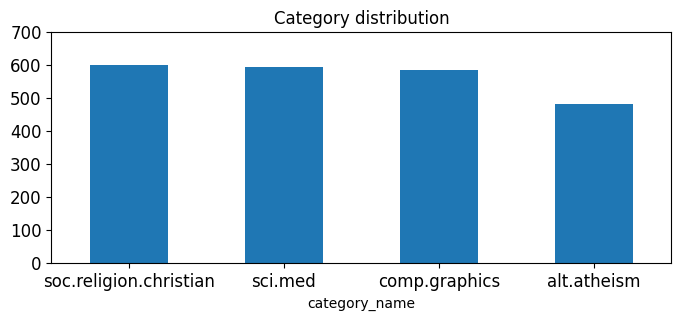

In [ ]:
print(X.category_name.value_counts())
# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',title = 'Category distribution', ylim = [0, 700], rot = 0, fontsize = 12, figsize = (8,3))

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


category_name
soc.religion.christian    274
sci.med                   258
comp.graphics             252
alt.atheism               216
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

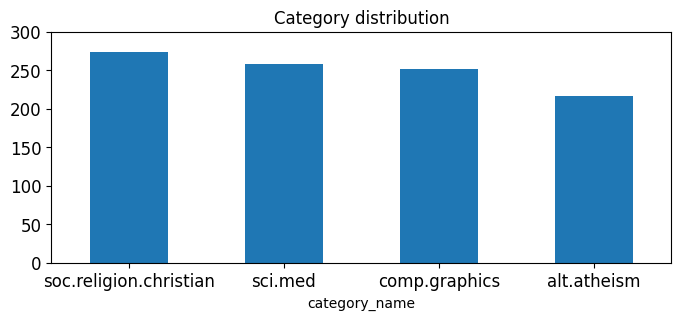

In [ ]:
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',title = 'Category distribution', ylim = [0, 300], rot = 0, fontsize = 12, figsize = (8,3))

## **>>> Exercise 7 (Watch Video):**
#### Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

category_name
soc.religion.christian    274
sci.med                   258
comp.graphics             252
alt.atheism               216
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

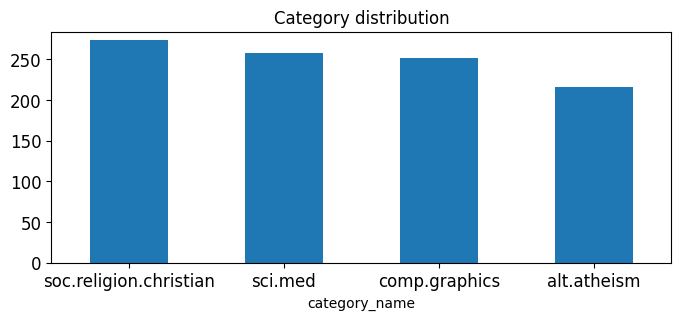

In [ ]:
upper_bound = max(X_sample.category_name.value_counts() + 10)
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',title = 'Category distribution',ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,3))

## **>>> Exercise 8 (take home):**
#### We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![image.png](attachment:image.png)

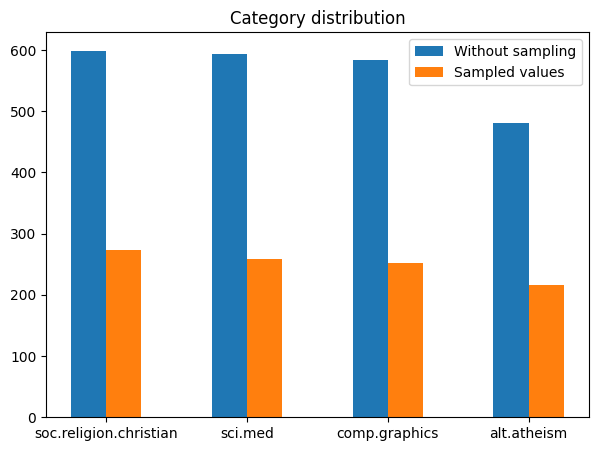

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories
categories = X.category_name.value_counts()
N = len(categories)

# Position of the categories in x-axis
bar_positions = np.arange(N)

# Graph size and bar width
plt.figure(figsize=(7, 5))
bar_width = 0.25

# Plotting the bars
plt.bar(bar_positions, categories, bar_width, label='Without sampling')
plt.bar(bar_positions + bar_width, X_sample.category_name.value_counts(), bar_width, label='Sampled values')

# Title and ticks
plt.title('Category distribution')
plt.xticks(bar_positions + bar_width / 2, categories.index)  # Use category names directly
plt.legend()
plt.show()


## 5.2 Feature Creation

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


In [ ]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [ ]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [ ]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

## 5.3 Feature subset selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [ ]:
count_vect.get_feature_names_out()[14887]

'from'

In [ ]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [ ]:
count_vect.get_feature_names_out()[8696]

'city'

In [ ]:
count_vect.get_feature_names_out()[4017]

'ac'

In [ ]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

## **>>> Exercise 9 (Watch Video):**
#### Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

Now let us look at the term-document matrix we built above.

In [ ]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [ ]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [ ]:
X_counts.shape

(2257, 35788)

In [ ]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [ ]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

## **>>> Exercise 10 (take home):**
#### We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
import numpy as np

# Convert the sparse matrix to a normal array
X_array = X_counts[0:5, 0:100].toarray()

# Use np.where to get the indices of values equal to 1 in the fifth record
terms = np.where(X_array[4] == 1)[0]

# Print these indices
print(terms)

# Retrieve the corresponding words based on the indices
words = count_vect.get_feature_names_out()[terms]
print(words)



[ 0 37]
['00' '01']


In [ ]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [ ]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [ ]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

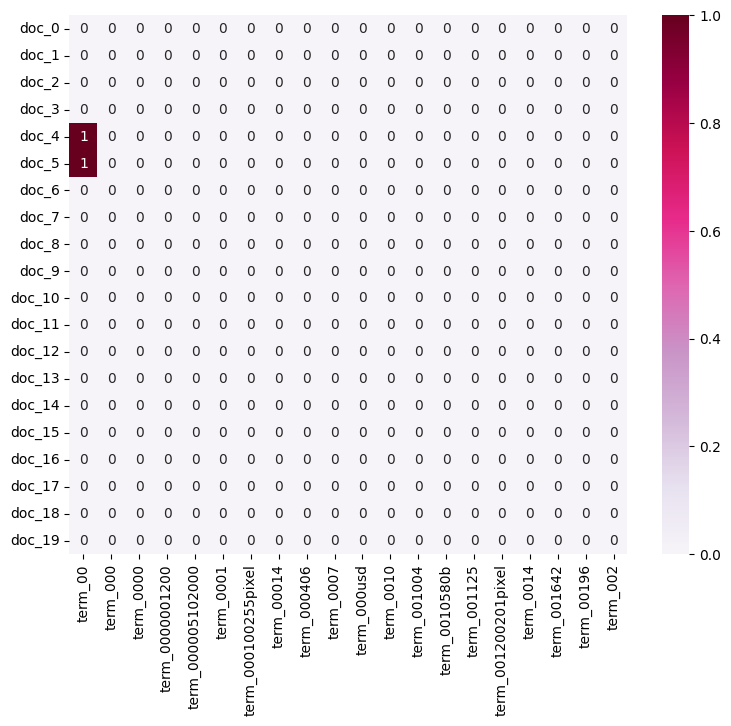

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd", vmin=0, vmax=1, annot=True)

## **>>> Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with FREQUENCY of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

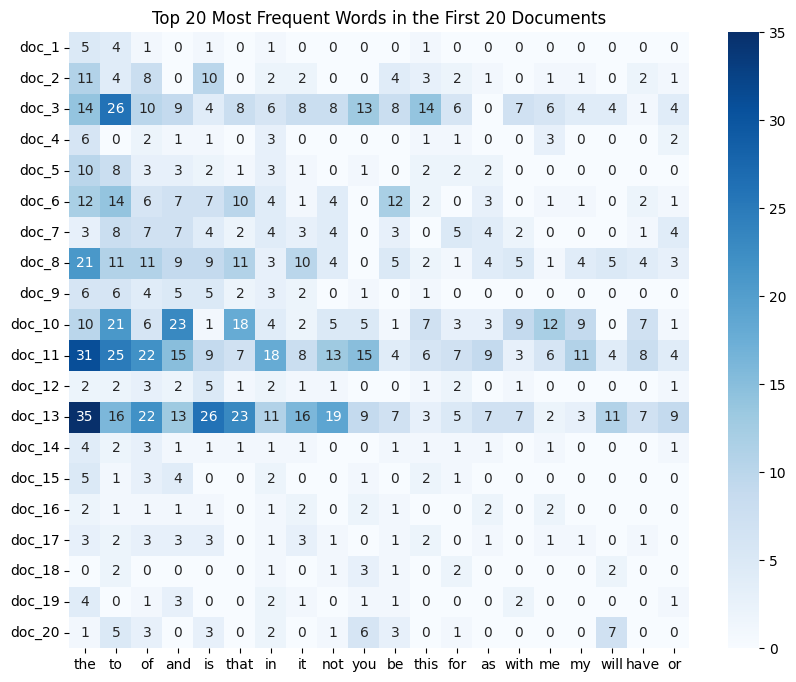

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 計算前20個文檔的詞頻矩陣
doc_20_array = X_counts[0:20, :].toarray()  # 前20個文檔的矩陣

# 計算每個詞彙在前20個文檔中的總頻率
total_word_frequencies = np.sum(doc_20_array, axis=0)  # 對列進行求和

# 找到前20個最頻繁詞的索引
top_20_indices = total_word_frequencies.argsort()[-20:][::-1]  # 取得頻率最高的前20個詞的索引，並按降序排列

# 獲取這些詞對應的詞彙名稱
top_20_words = count_vect.get_feature_names_out()[top_20_indices]

# 獲取前20個文檔中這些詞的出現次數
top_20_word_counts = doc_20_array[:, top_20_indices]  # 只取出這些詞的頻率

# 將結果轉為DataFrame以便繪圖
df_top_20 = pd.DataFrame(top_20_word_counts, columns=top_20_words, index=["doc_"+str(i) for i in range(1, 21)])

# 繪製熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(df_top_20, cmap="Blues", annot=True, fmt="d")
plt.title("Top 20 Most Frequent Words in the First 20 Documents")
plt.show()



## 5.4 Attribute Transformation / Aggregation

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [ ]:
term_frequencies[0] #sum of first term: 00

134

<ipython-input-93-9cb5cf1287d9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


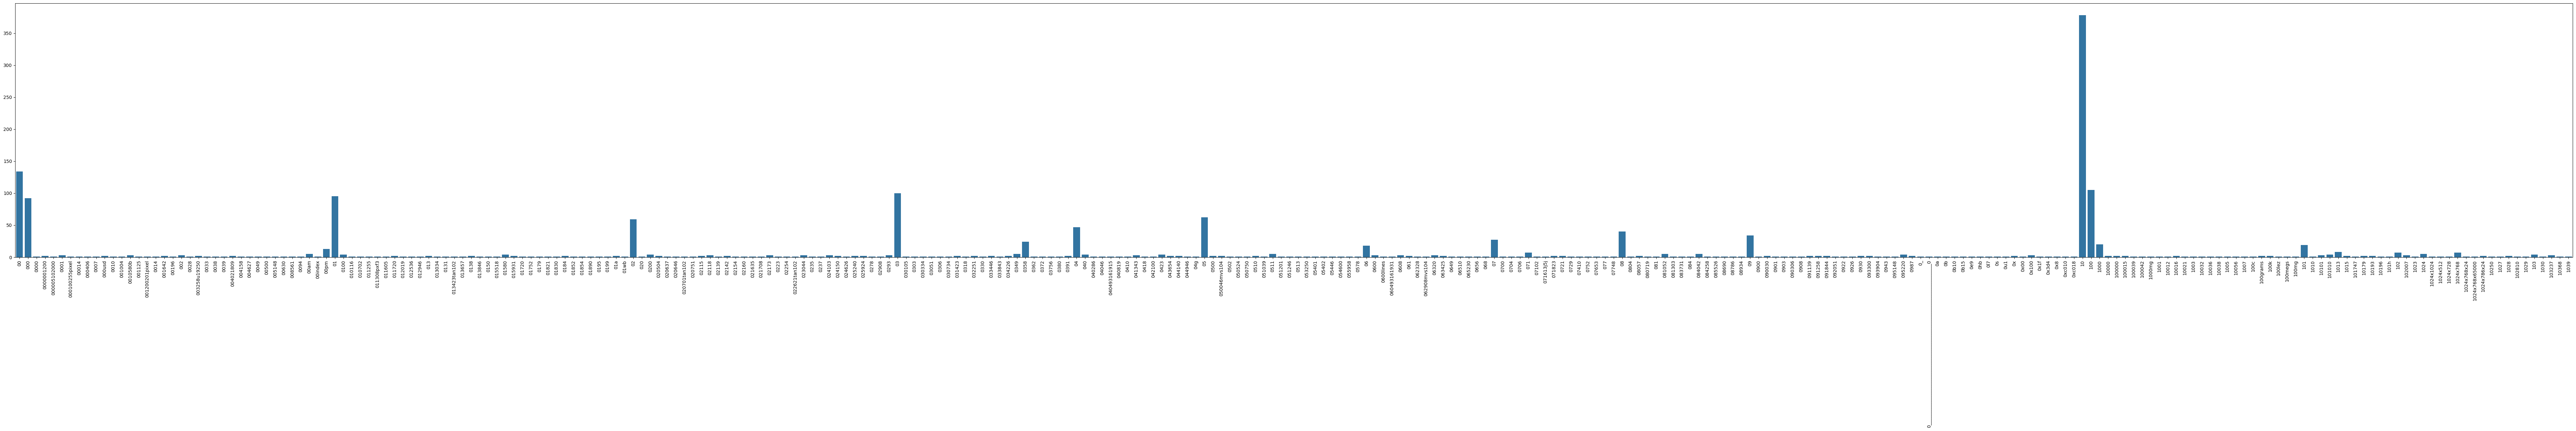

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## **>>> Exercise 12 (take home):**
#### If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
import plotly.express as px
import pandas as pd

# 假設 term_frequencies 是您計算的詞彙頻率
terms = count_vect.get_feature_names_out()[:300]  # 取前300個詞彙
df = pd.DataFrame({'Term': terms, 'Frequency': term_frequencies[:300]})

# 創建條形圖
fig = px.bar(df, x='Term', y='Frequency', title='Top 300 Term Frequencies', labels={'Term': 'Terms', 'Frequency': 'Frequencies'})

# 設置 x 軸標籤旋轉
fig.update_layout(xaxis_tickangle=-45)  # 設置 x 軸標籤旋轉45度

# 顯示圖表
fig.show()




## **>>> Exercise 13 (take home):**

#### The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

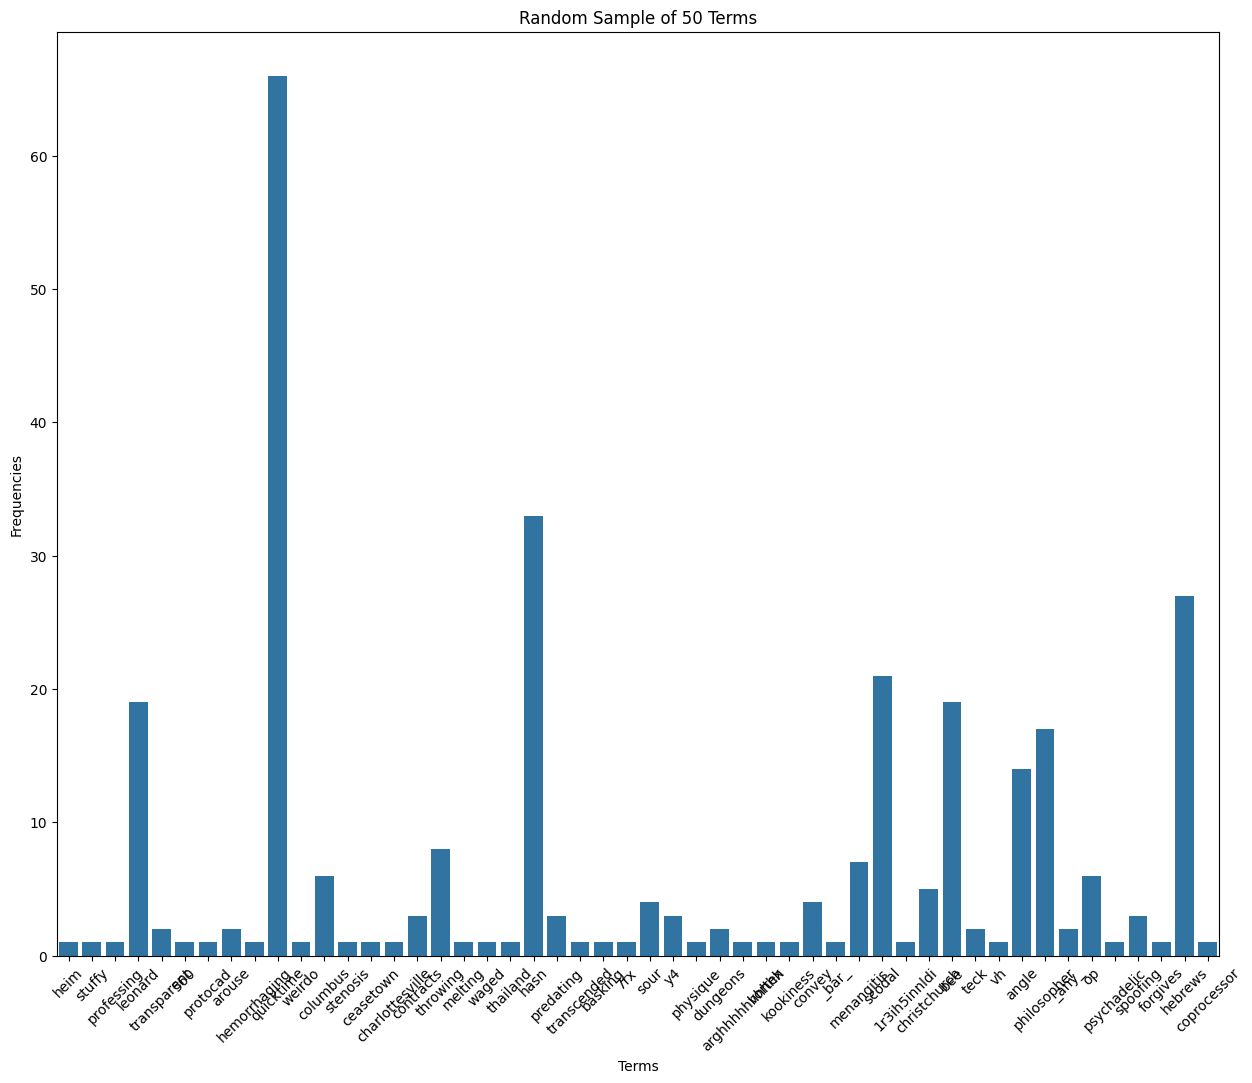

In [ ]:
import random

# 隨機選擇 N 個詞彙
sample_size = 50  # 想要隨機選擇的詞彙數量
sample_indices = random.sample(range(X_counts.shape[1]), sample_size)

# 繪製條形圖
plt.figure(figsize=(15, 12))
sns.barplot(x=count_vect.get_feature_names_out()[sample_indices], y=term_frequencies[sample_indices])
plt.xticks(rotation=45)
plt.title(f'Random Sample of {sample_size} Terms')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.show()


## **>>> Exercise 14 (take home):**
#### Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [ ]:
import numpy as np
import plotly.express as px

# 計算每個詞彙的頻率
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# 獲取高頻詞的索引
top_n = 50  # 您可以根據需要調整 N 的值
top_indices = np.argsort(term_frequencies)[-top_n:]  # 獲取頻率最高的 N 個詞彙的索引

# 準備數據
terms = count_vect.get_feature_names_out()[top_indices]
frequencies = term_frequencies[top_indices]

# 按頻率排序
sorted_indices = np.argsort(frequencies)[::-1]  # 由高到低排序
sorted_terms = terms[sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

# 繪製條形圖
fig = px.bar(x=sorted_terms, y=sorted_frequencies, title=f'Top {top_n} Term Frequencies Sorted by Frequency',
             labels={'x': 'Terms', 'y': 'Frequencies'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<ipython-input-98-95b72ce9758d>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



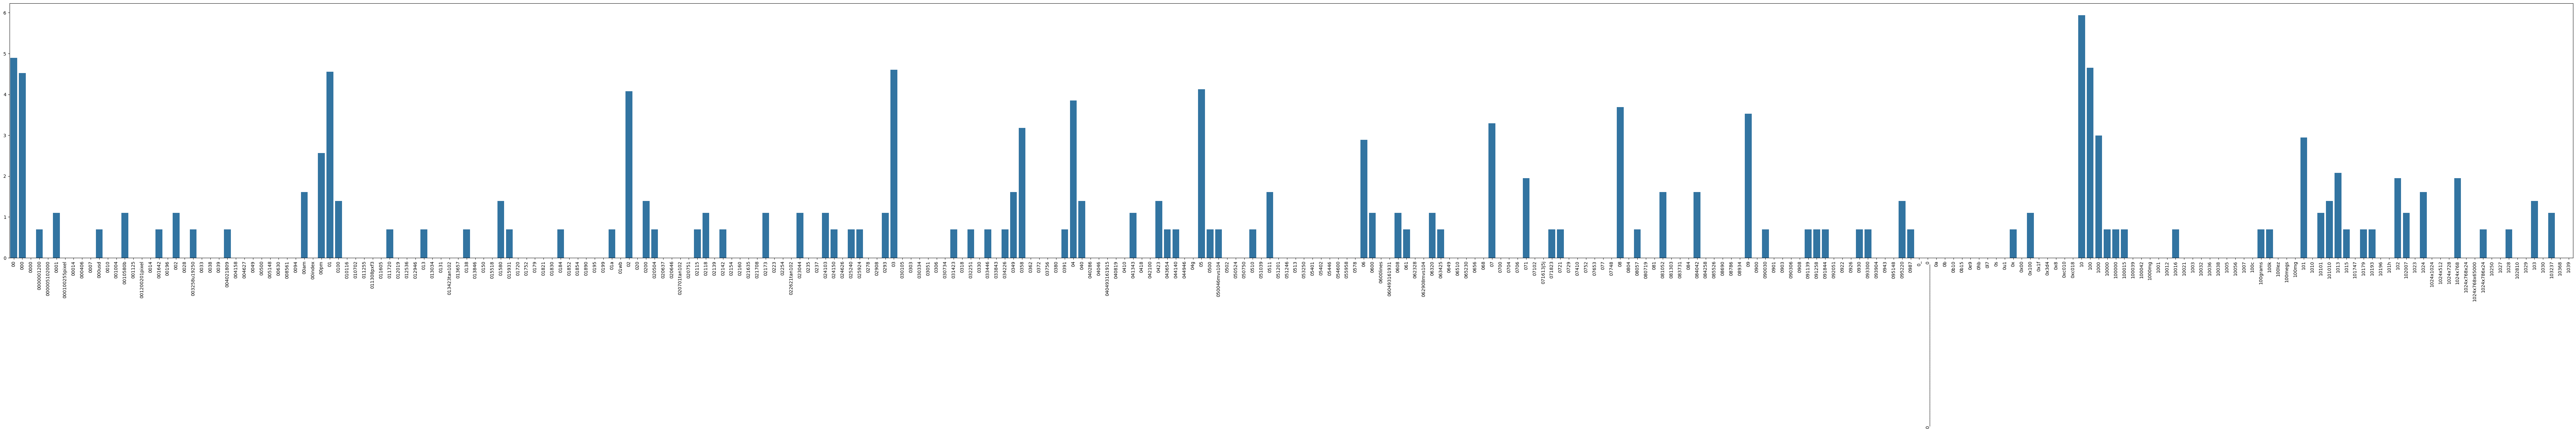

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## **>>> Exercise 15 (take home):**
#### You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [ ]:
import numpy as np
import plotly.express as px
import math

# 計算每個詞彙的頻率
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# 將詞頻轉換為對數，避免 log(0) 的情況
term_frequencies_log = [math.log(f) if f > 0 else 0 for f in term_frequencies]

# 獲取高頻詞的索引
top_n = 50  # 您可以根據需要調整 N 的值
top_indices = np.argsort(term_frequencies_log)[-top_n:]  # 獲取對數頻率最高的 N 個詞彙的索引

# 準備數據
terms = count_vect.get_feature_names_out()[top_indices]
frequencies_log = np.array(term_frequencies_log)[top_indices]

# 按頻率排序
sorted_indices = np.argsort(frequencies_log)[::-1]  # 由高到低排序
sorted_terms = terms[sorted_indices]
sorted_frequencies_log = frequencies_log[sorted_indices]

# 繪製條形圖
fig = px.bar(x=sorted_terms, y=sorted_frequencies_log, title=f'Top {top_n} Log-Term Frequencies Sorted by Frequency',
             labels={'x': 'Terms', 'y': 'Log Frequencies'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


When using a logarithmic transformation, the frequency values ​​in the bar chart will appear more even. This is because the logarithm closes the gap between high- and low-frequency words. In the original bar chart, the first few high-frequency words will stand out, while the frequencies of the remaining words will be barely visible; in the logarithmic chart, the differences between these words will appear smoother.

#### **Finding frequent patterns**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


00  000  000005102000  000100255pixel  0007  000usd  0010580b  \
0     0    0             0               0     0       0         0   
1     0    0             0               0     0       0         0   
2     0    0             0               0     0       0         0   
3     0    0             0               0     0       0         0   
4     0    0             0               0     0       0         0   
..   ..  ...           ...             ...   ...     ...       ...   
579   0    0             0               0     0       0         0   
580   0    0             0               0     0       0         0   
581   0    0             0               0     0       0         0   
582   0    0             0               0     0       0         0   
583   0    0             0               0     0       0         0   

     001200201pixel  00196  002  ...  zorn  zrz  zsoft  zt  zug  zurich  zvi  \
0                 0      0    0  ...     0    0      0   0    0       0    0   
1                 0      0    0  ...     0    0      0   0    0       0    0   
2                 0      0    0  ...     0    0      0   0    0       0    0   
3                 0      0    0  ...     0    0      0   0    0       0    0   
4                 0      0    0  ...     0    0      0   0    0       0    0   
..              ...    ...  ...  ...   ...  ...    ...  ..  ...     ...  ...   
579               0      0    0  ...     0    0      0   0    0       0    0   
580               0      0    0  ...     0    0      0   0    0       0    0   
581               0      0    0  ...     0    0      0   0    0       0    0   
582               0      0    0  ...     0    0      0   0    0       0    0   
583               0      0    0  ...     0    0      0   0    0       0    0   

     zyeh  zyxel  ªl  
0       0      0   0  
1       0      0   0  
2       0      0   0  
3       0      0   0  
4       0      0   0  
..    ...    ...  ..  
579     0      0   0  
580     0      0   0  
581     0      0   0  
582     0      0   0  
583     0      0   0  

[584 rows x 13756 columns]

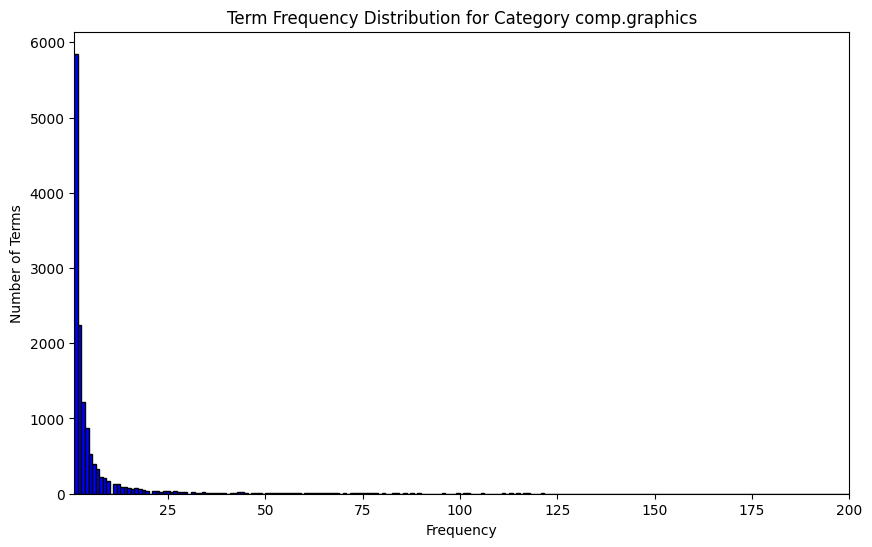

In [ ]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [ ]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in top 5%: 687
Filtered terms: ['the', 'to', 'of', 'and', 'is', 'in', 'for', 'it', 'from', 'you', 'edu', 'that', 'on', 'this', 'or', 'be', 'with', 'have', 'lines', 'can', 'subject', 'are', 'graphics', 'if', 'organization', 'image', 'as', 'not', 'but', 'at', 'there', 'com', 'an', 'any', 'will', 'by', 'university', 're', 'about', 'some', 'posting', 'file', 'do', 'all', 'would', 'host', 'jpeg', 'what', 'so', 'nntp', 'has', 'files', 'which', 'one', 'also', 'me', 'use', 'software', 'was', 'my', 'images', 'writes', 'other', 'article', 'out', 'data', 'program', 'know', 'like', 'version', 'more', 'color', 'ftp', 'your', 'get', 'computer', 'don', '3d', 'does', 'no', 'mail', 'format', 'they', 'available', 'need', 'we', 'ca', 'thanks', 'just', 'bit', 'gif', 'how', 'help', 'am', 'please', 'package', 'pub', 'anyone', 'very', 'information', 'using', 'code', 'line', 'than', 'find', 'system', 'only', 'time', 'where', '24', 'windows', 'good', 'uk', 'cs', 'display

In [ ]:
sorted_counts #We can see the frequencies sorted in a descending order

array([4537, 2775, 2470, ...,    1,    1,    1])

In [ ]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([12266, 12390,  9021, ...,  7181,  7183,  6877])

In [ ]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

4537

In [ ]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in bottom 1%: 137
Filtered terms: ['initworld', 'jkpg', 'jiu1', 'jiu', 'jfreund', 'jeremy', 'jena', 'jem', 'jele', 'jeffrey', 'jbalgley', 'jasper', 'jancene', 'jaguar', 'jaggies', 'jagged', 'jaclyn', 'jacky', 'ja', 'ixos', 'ixels', 'ix', 'ivr', 'ivnorm', 'iv2scn', 'itri', 'itor', 'itnsg1', 'jman', 'itn', 'jna', 'joes', 'jump', 'juelin', 'judge', 'juan', 'jroberts', 'jr', 'jpsrc4', 'jplpost', 'jpgs', 'jpg95', 'jpg75', 'jpg5o', 'jpg50', 'jpg25', 'jpegv4', 'jpegsrc4', 'jpeged', 'jpeg4bin', 'jpeg4386', 'journalix', 'josephson', 'jong', 'joint', 'join', 'johnm', 'johnl', 'jogle', 'jobs', 'jun', 'ithil', 'iterate', 'ipsc2', 'ipcs', 'ipa', 'ious', 'ior', 'ions', 'iol', 'io', 'invited', 'invisible', 'investment', 'investigator', 'investigation', 'investigating', 'inversion', 'inventing', 'invent', 'invariants', 'invariably', 'inumerable', 'intuitive', 'introducing', 'intricacies', 'intervention', 'interval', 'interpretor', 'interpretations', 'ipu', 'iter

In [ ]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([   1,    1,    1, ..., 2470, 2775, 4537])

In [ ]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([ 6877,  7183,  7181, ...,  9021, 12390, 12266])

In [ ]:
filt_term_document_dfs[categories[category_number]].loc[:,'l14h11'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

1

In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

## **>>> Exercise 16 (take home):**
#### Review the words that were filtered in each category and comment about the differences and similarities that you can see.

在所有類別中，前 5% 的單字大多包含在句子中頻繁出現且對語法結構至關重要的功能詞（例如 the、of、and、to）。這表明不同主題的文本在基本語言結構上是相似的。

在 comp.graphics 類別中， initworld 和 jfreund 等排名靠後 1% 的單字可能是與圖形或電腦科學相關的特殊名詞或低頻詞，表明該類別中存在一些特定主題。

在 soc.religion.christian 類別中，諸如不同和剝削之類的底層詞可能指與社會或宗教問題相關的特殊情況或討論。

在 sci.med 類別中，像 íålittin 和 icl 這樣的底部單字似乎是拼寫錯誤或特定術語，這在醫學領域可能相對常見。

在alt.atheism範疇中，zyklon等底層詞指涉某些歷史事件或特定語境下的詞語，體現了此範疇的特殊性。

<hr>

In [ ]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')



Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


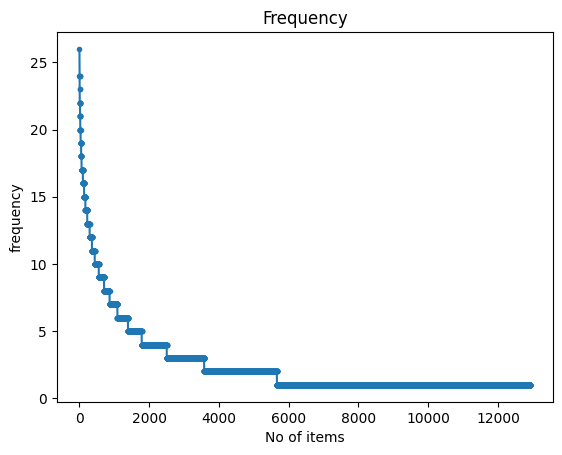

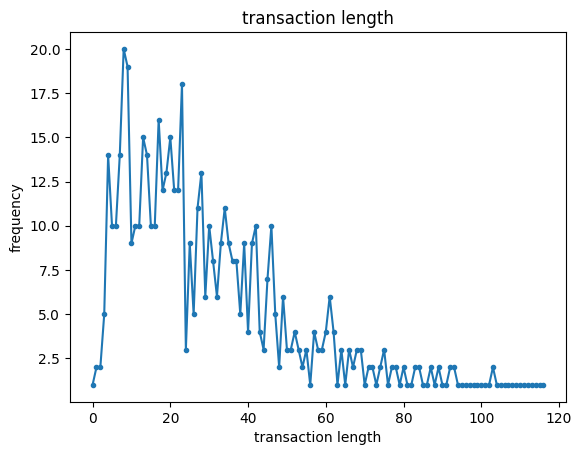

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


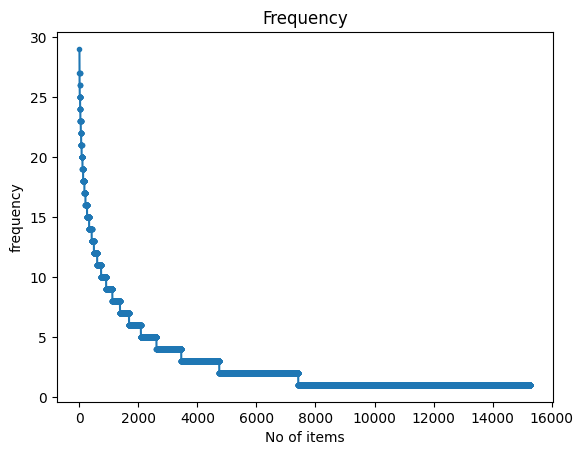

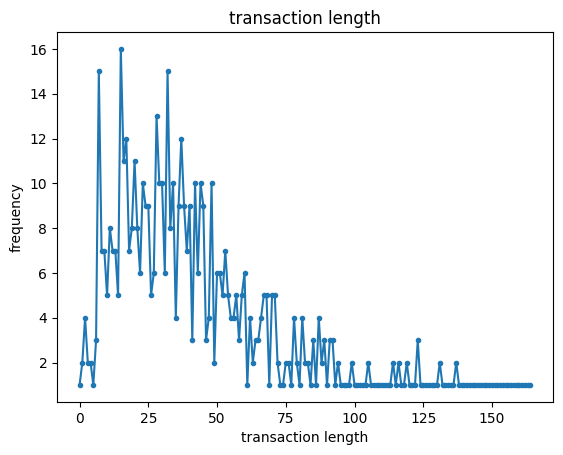

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554198995
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


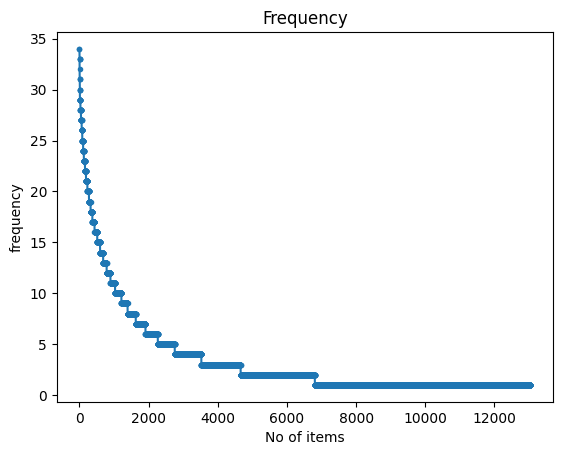

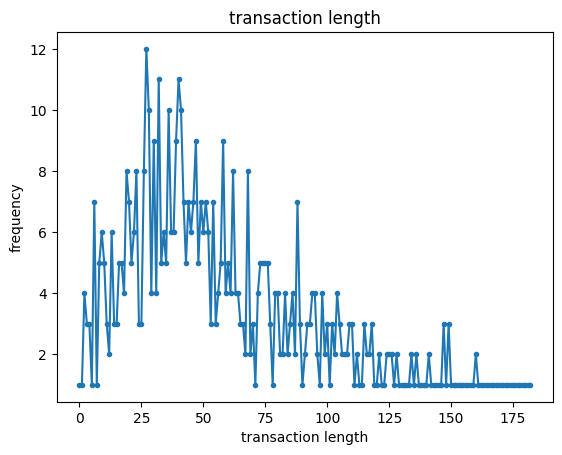

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


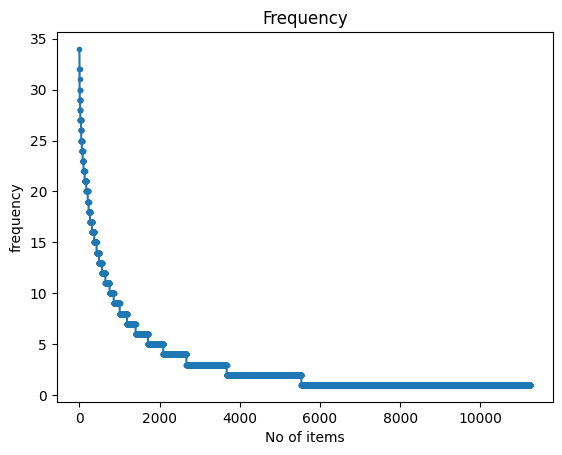

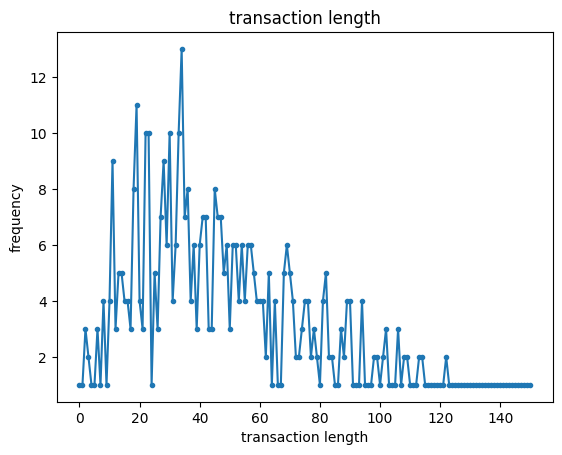

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.22249650955200195


In [ ]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.24642252922058105


In [ ]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0            choices        9
1               corp        9
2           hausmann        9
3     hausmann maddi        9
4               kids        9
...              ...      ...
4671            date       31
4672        date gmt       19
4673            stay       32
4674         snm6394       32
4675             gmt       34

[4676 rows x 2 columns]

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.6987602710723877


In [ ]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.3488802909851074


In [ ]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)



In [ ]:
augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

## **>>> Exercise 17 (take home):**
#### Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. Only implement the mining part of the algorithm and display the resulting patterns, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

FAE Top-K

In [ ]:
import time
import pandas as pd
from FAE import FAE  # 確保導入正確

# 設定要測試的 k 值
k_values = [500, 1000, 1500]

# 針對每個 k 值運行 FAE Top-K 演算法
for k in k_values:
    print(f"Running FAE Top-K with k = {k}")

    # 開始計時
    start_time = time.time()

    # 初始化 FAE 物件，假設 FAE 類有 iFile 和 k 參數
    obj2 = FAE(iFile='td_freq_db_comp_graphics.csv', k=k)

    # 執行挖掘
    obj2.mine()

    # 提取模式為 DataFrame
    patterns_df = obj2.getPatternsAsDataFrame()

    # 計算執行時間
    runtime = time.time() - start_time

    # 顯示模式總數和執行時間
    print(f"Total No of patterns for k = {k}: {len(patterns_df)}")
    print(f"Runtime for k = {k}: {runtime:.2f} seconds")

    # 顯示前 10 個模式
    print(f"Patterns (first 10) for k = {k}:")
    print(patterns_df.head(10))




Running FAE Top-K with k = 500
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k = 500: 500
Runtime for k = 500: 1.45 seconds
Patterns (first 10) for k = 500:
   Patterns  Support
0     maybe       26
1      life       24
2     ideas       24
3      feel       24
4     tried       24
5     wrong       23
6     needs       23
7   correct       22
8      didn       22
9  recently       22
Running FAE Top-K with k = 1000
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k = 1000: 1000
Runtime for k = 1000: 3.01 seconds
Patterns (first 10) for k = 1000:
   Patterns  Support
0     maybe       26
1      life       24
2     ideas       24
3      feel       24
4     tried       24
5     wrong       23
6     needs       23
7   correct       22
8      didn       22
9  recently       22
Running FAE Top-K with k = 1500
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No o

MaxFPGrowth

In [ ]:
import time
import pandas as pd
from MaxFPGrowth import MaxFPGrowth  # 確保導入正確

# 設定要測試的最低支持度閾值
min_sups = [3, 6, 9]

# 針對每個最低支持度運行 MaxFPGrowth 演算法
for min_sup in min_sups:
    print(f"Running MaxFPGrowth with minSup = {min_sup}")
    obj3 = MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=min_sup)
    obj3.mine()

    # 提取模式為 DataFrame
    patterns_df = obj3.getPatternsAsDataFrame()

    # 顯示模式總數和執行時間
    print(f"Total No of patterns for minSup = {min_sup}: {len(patterns_df)}")
    print(f"Runtime for minSup = {min_sup}: {obj3.getRuntime()}")

    # 顯示前 10 個模式
    print(f"Patterns (first 10) for minSup = {min_sup}:")
    print(patterns_df.head(10))


Running MaxFPGrowth with minSup = 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup = 3: 6872
Runtime for minSup = 3: 32.73145270347595
Patterns (first 10) for minSup = 3:
                                            Patterns  Support
0  due bytes responsible 000 opinion 640x480 rob ...        3
1                                               bag         3
2                                       garbo uwasa         3
3          wrong 200 responsible 000 umn 480 640 tc         3
4                             responsible 000 essex         3
5                                              pack         3
6                                 jeff _____ ______         3
7                                               api         3
8  human home multimedia workstation ready advice...        3
9                                                kr         3
Running MaxFPGrowth with minSup = 6
Maximal Frequent patterns were generated s

**FPGrowth 演算法**

模式總數：33574

運行時間：0.9248991012573242 秒。

k = 500 的運行時間約為 1.46 秒。

k = 1000 的運行時間約為 3.87 秒。

k = 1500 的運行時間約為 8.26 秒。

**FAE Top-K 演算法的運行時間隨著 k 值的增加而增加**

最低支持度閾值為 3 的運行時間約為 46.89 秒

最低支持度閾值為 6 的運行時間約為 0.7秒

最低支持度閾值為 9 的運行時間約為 0.38 秒

**MaxFPGrowth 的運行時間在不同的支持度閾值下有所不同**，最低支持度為 3 時的運行時間為 46.89 秒，而支持度為 6 和 9 時則分別為 0.7 秒和 0.38 秒，顯示在更高支持度閾值下，算法的效率提高。

## 5.5 Dimensionality Reduction

In [ ]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
X_pca_tdm.shape

(2257, 2)

In [ ]:
X_tsne_tdm.shape

(2257, 2)

In [ ]:
X_umap_tdm.shape

(2257, 2)

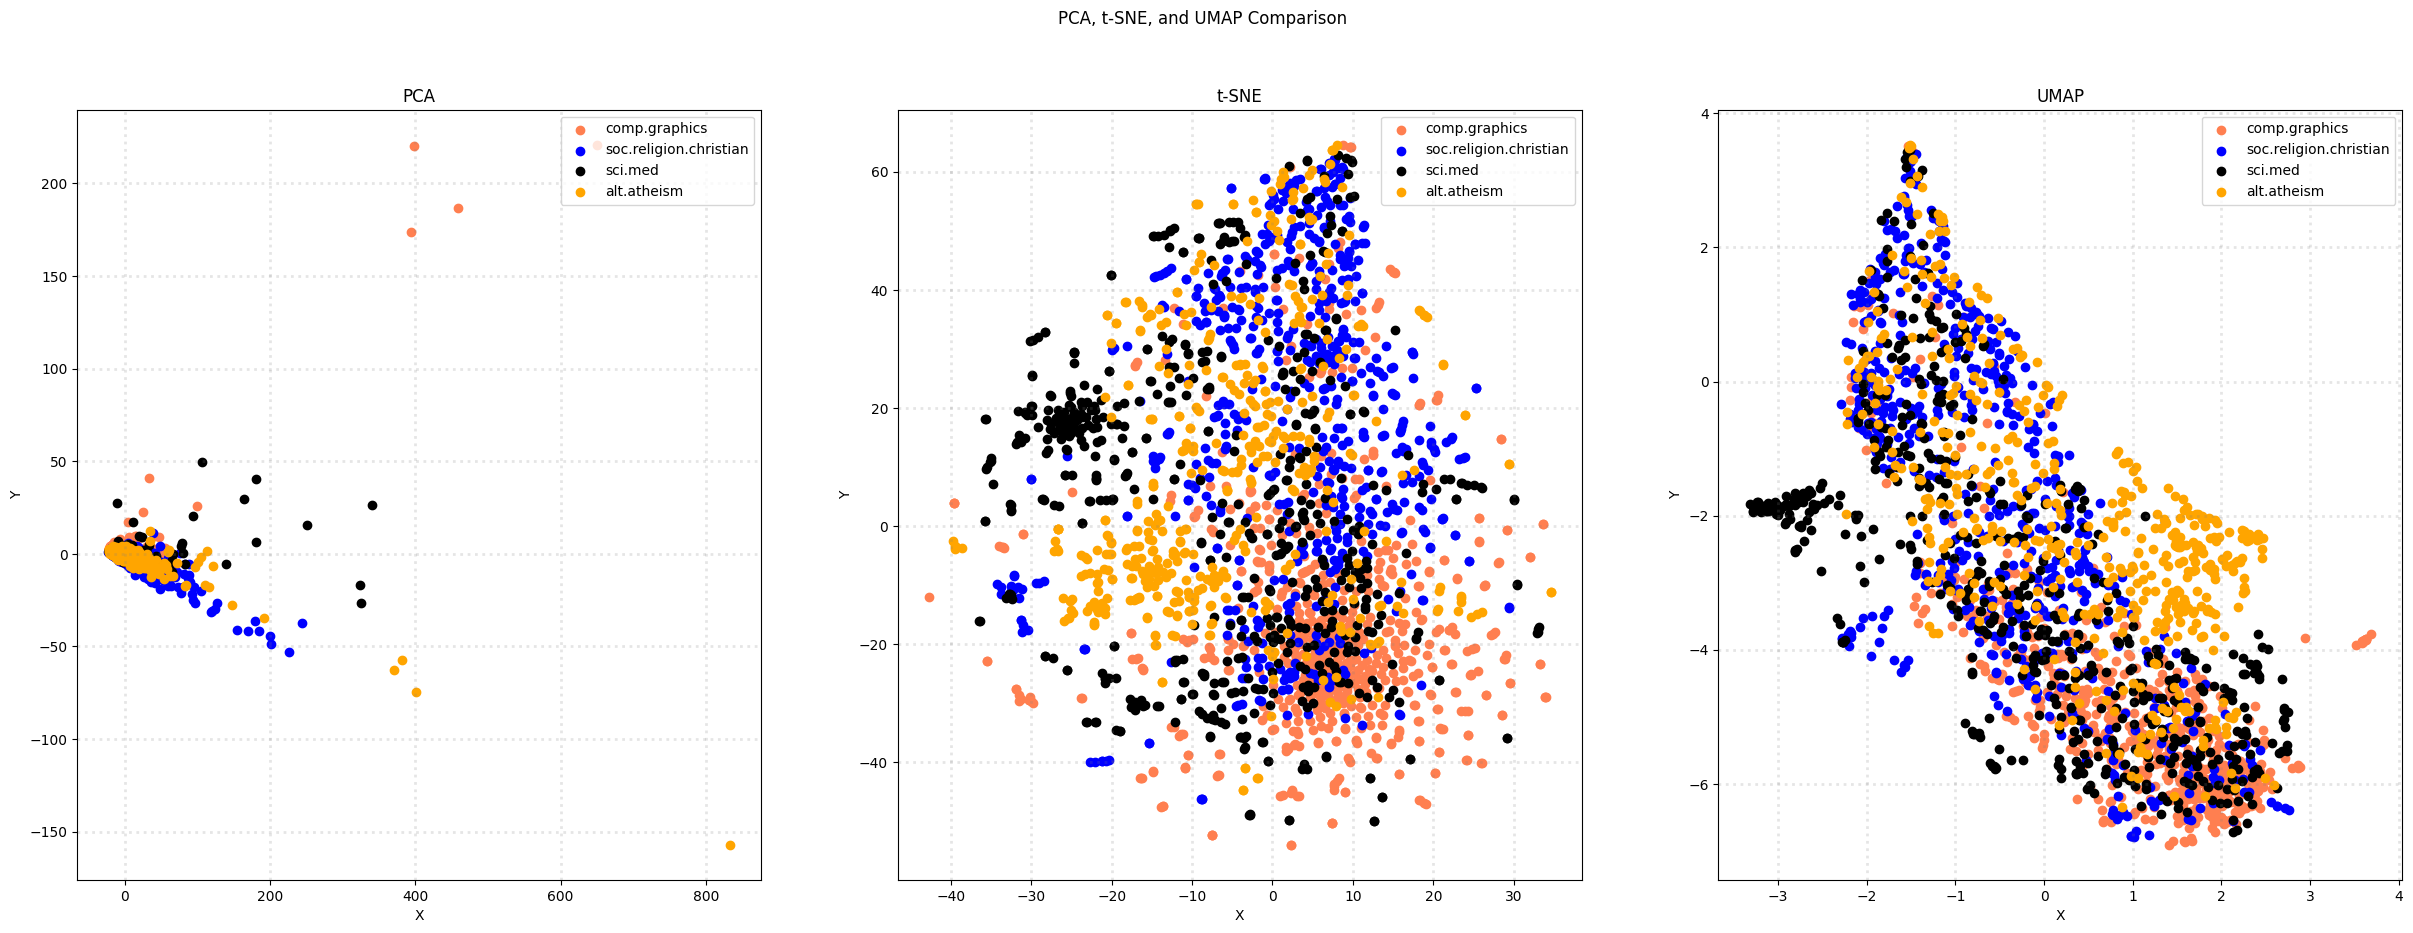

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [ ]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

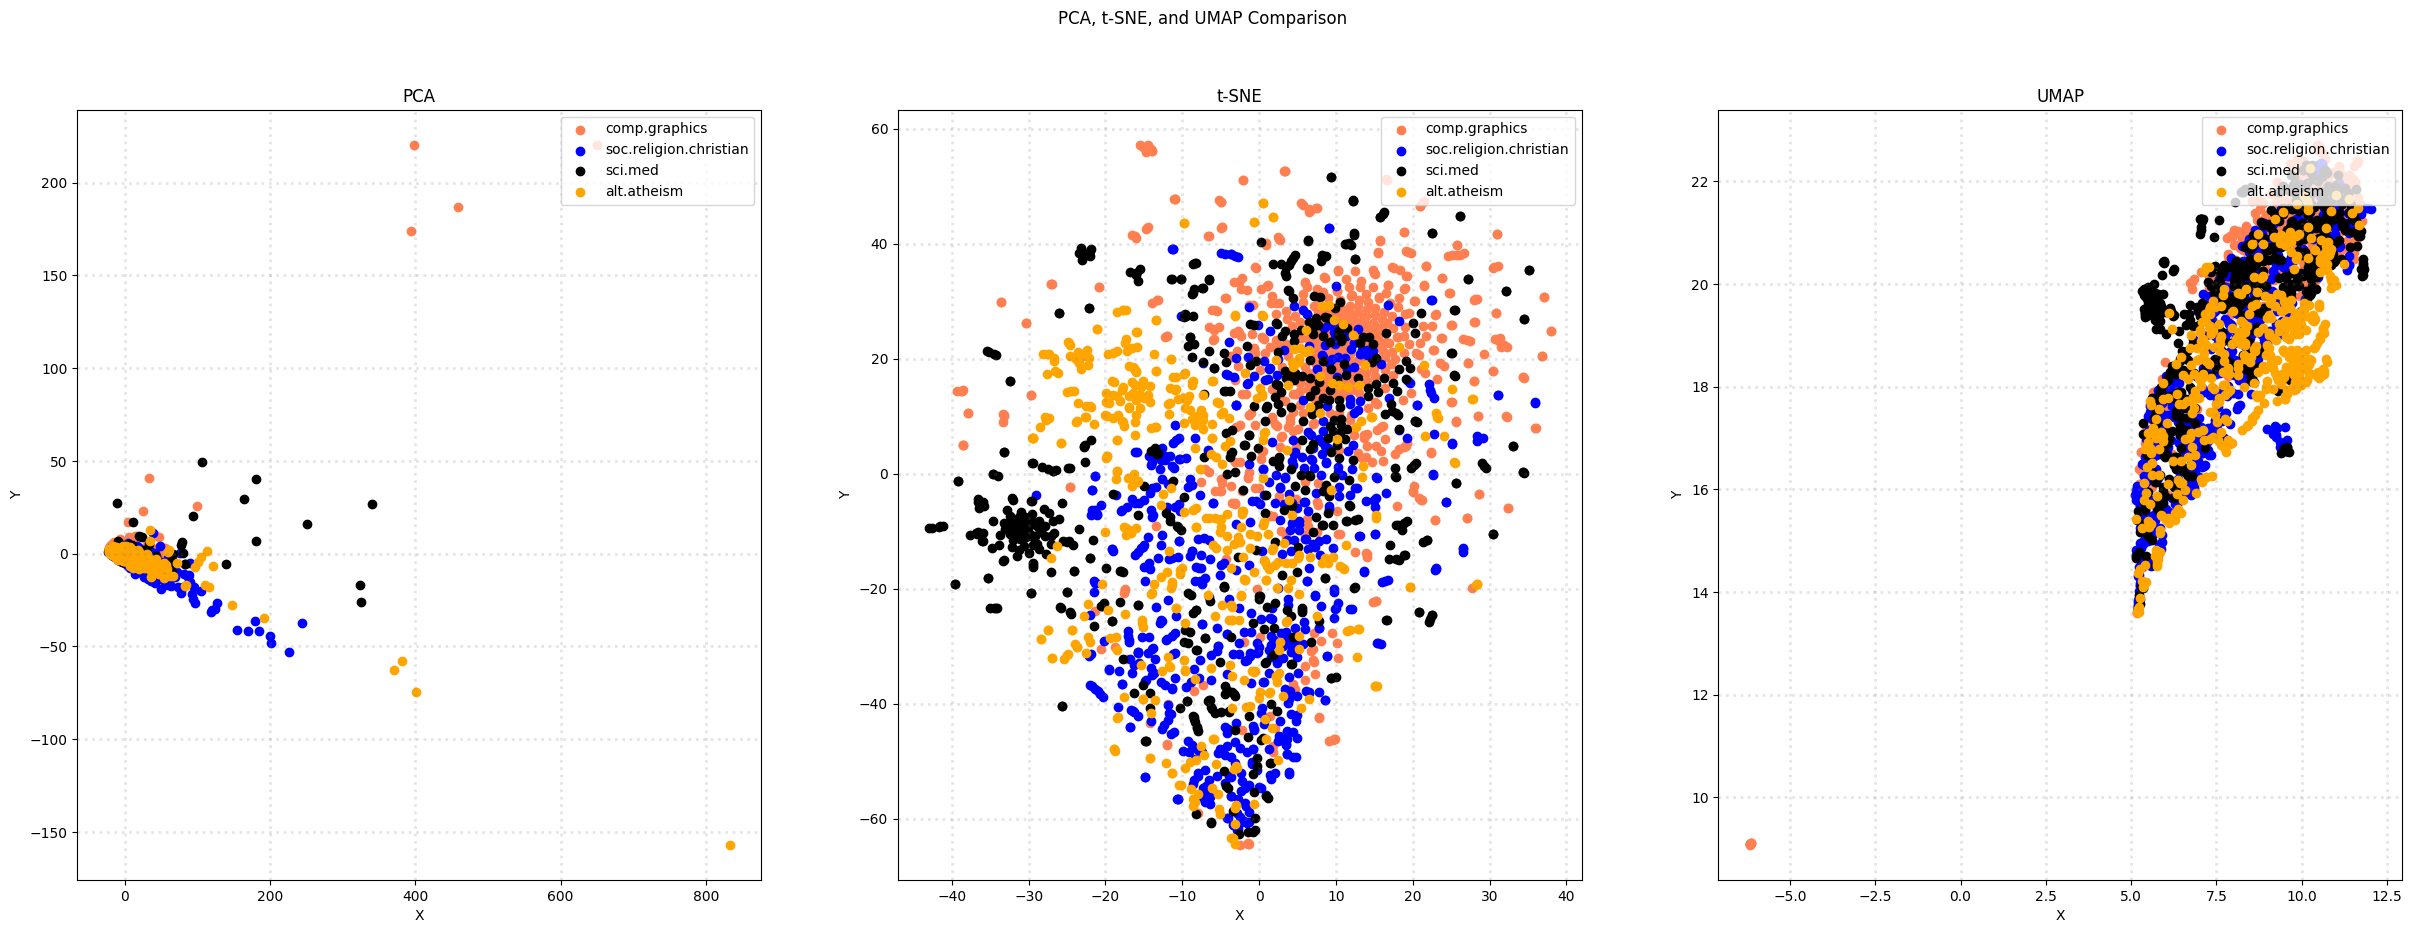

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

## >>> Exercise 18 (take home):
#### Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

#### Hint: you can refer to Axes3D in the documentation.

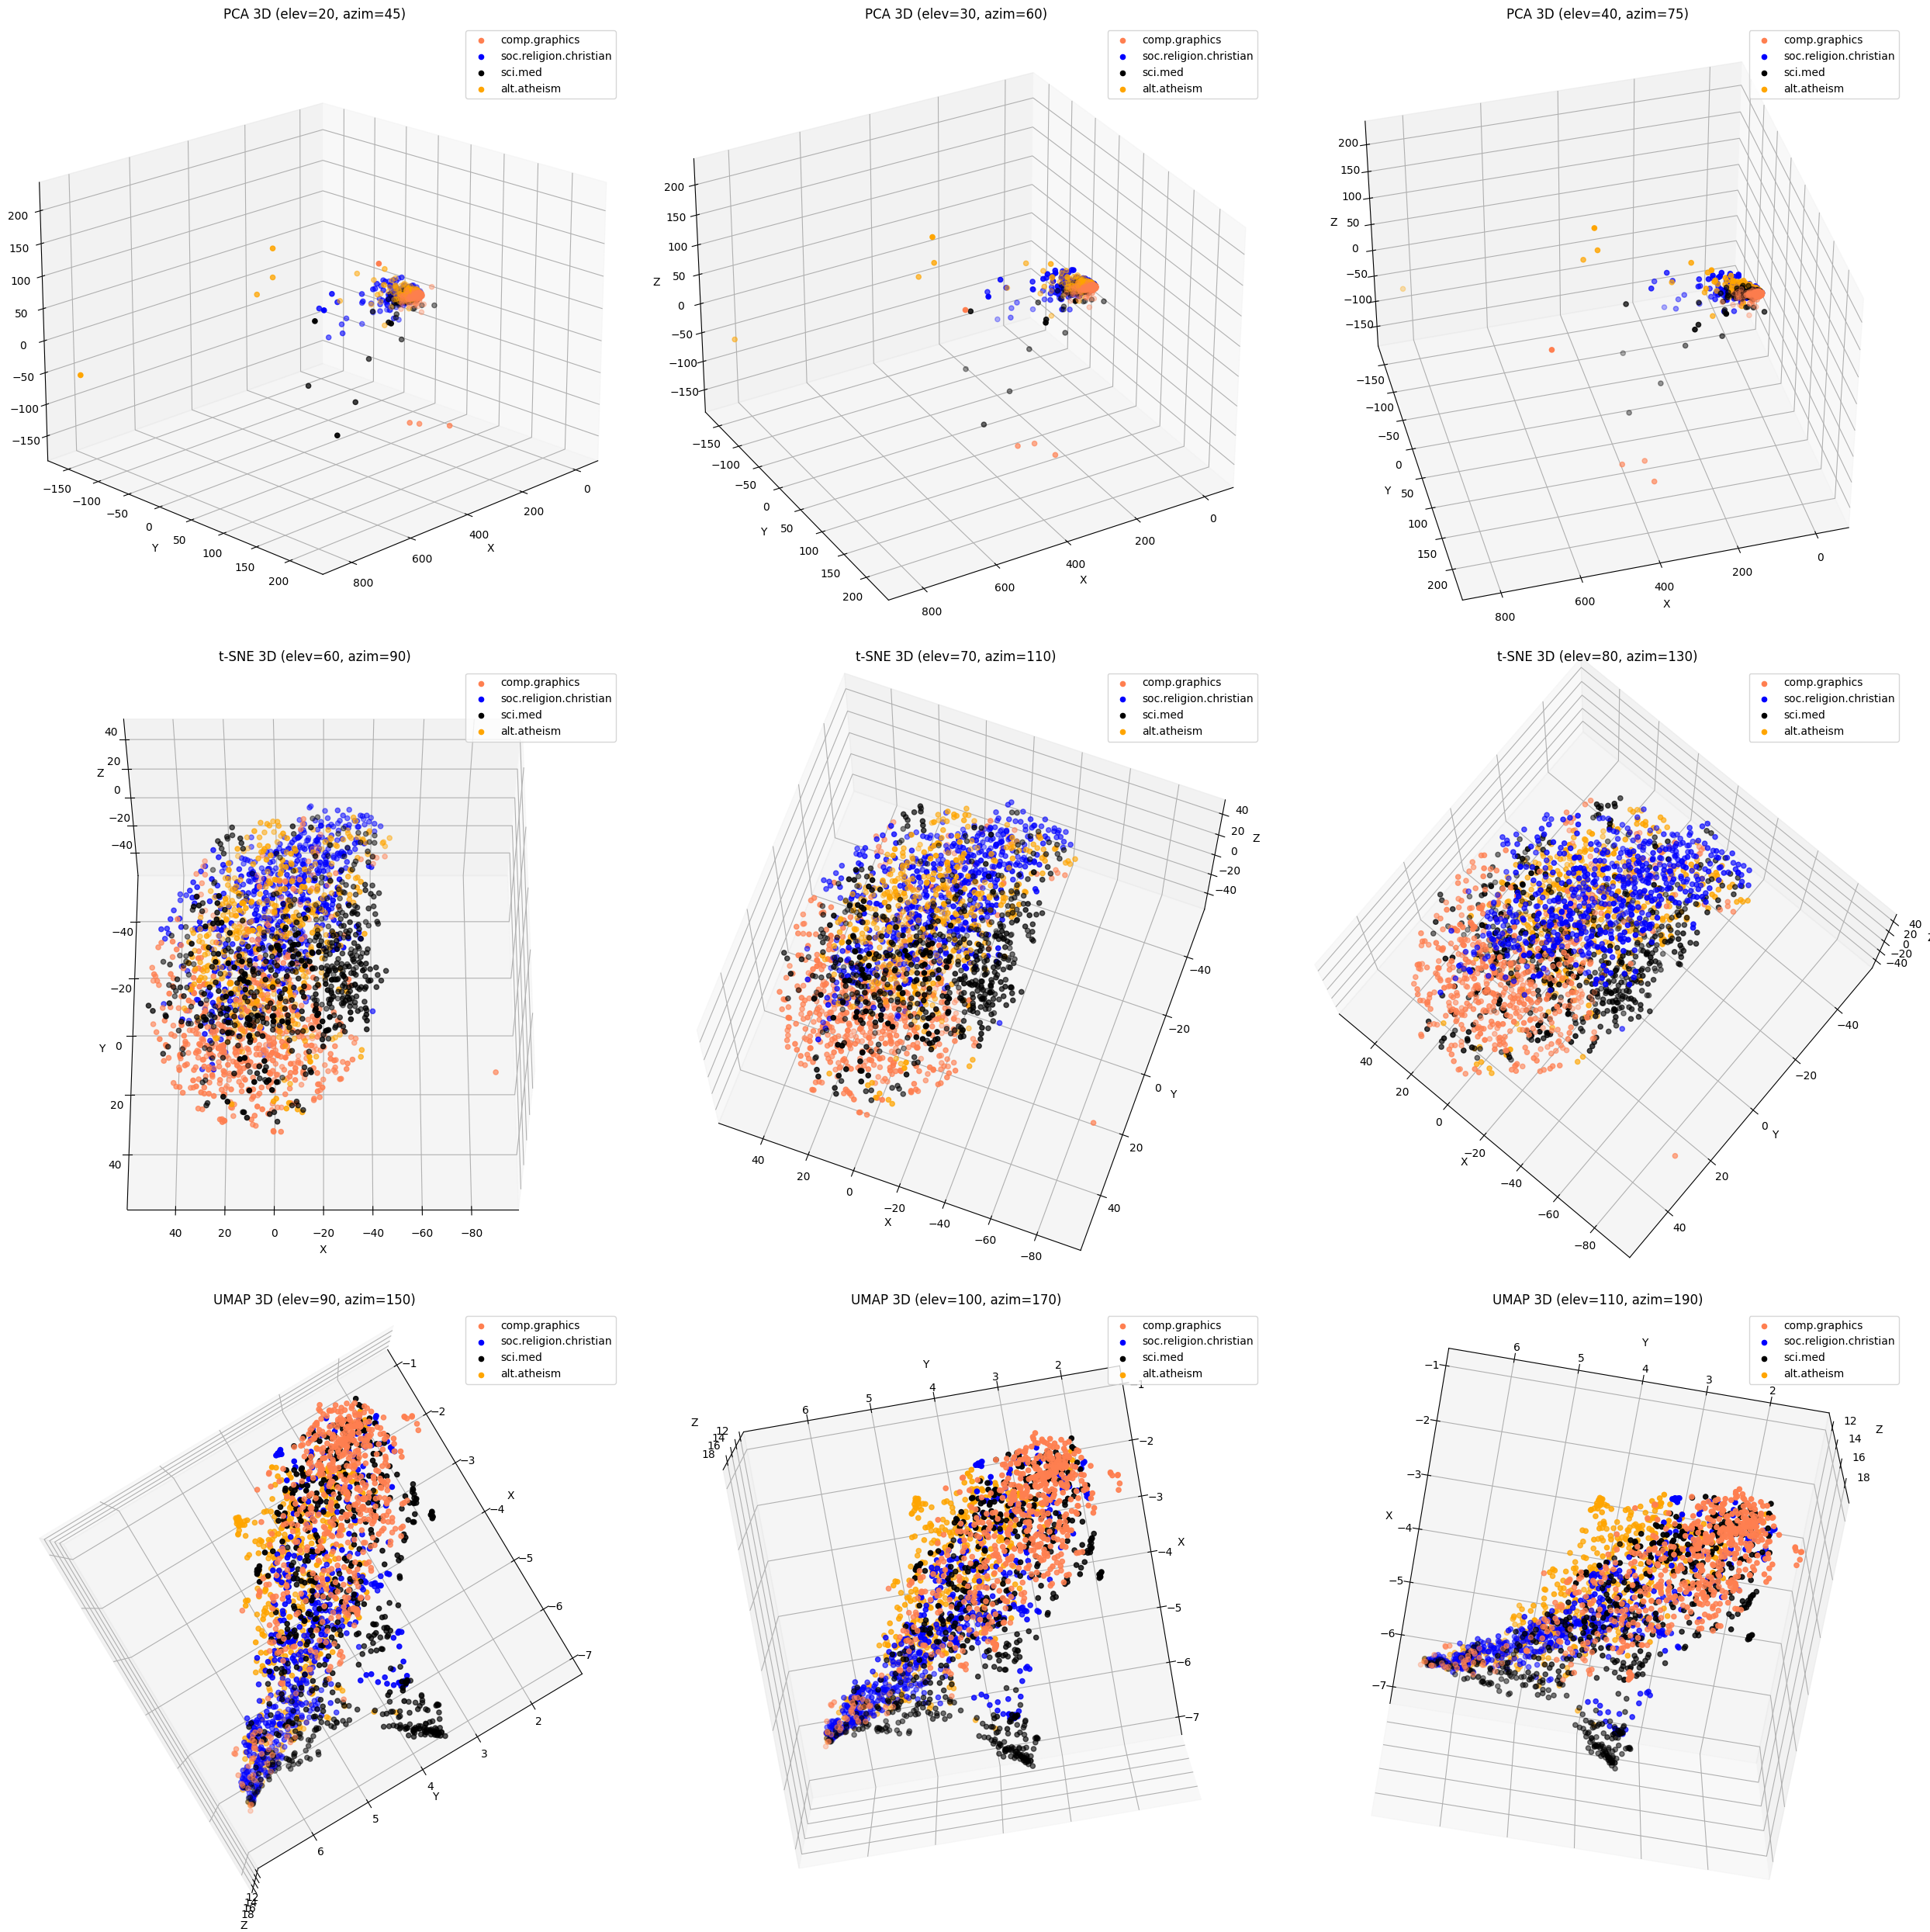

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data with 3 components
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define a function to create 3D scatter plots
def plot_3d_scatter(X_reduced, title, ax, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Create a figure for the 9 3D plots (3x3 grid)
fig = plt.figure(figsize=(25, 25))

# Define different view angles for each plot
angles = [(20, 45), (30, 60), (40, 75), (60, 90), (70, 110), (80, 130), (90, 150), (100, 170), (110, 190)]

# Plot PCA in the first row with different angles
for i, (elev, azim) in enumerate(angles[:3]):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    plot_3d_scatter(X_pca_3d, f'PCA 3D (elev={elev}, azim={azim})', ax, elev, azim)

# Plot t-SNE in the second row with different angles
for i, (elev, azim) in enumerate(angles[3:6]):
    ax = fig.add_subplot(3, 3, i+4, projection='3d')
    plot_3d_scatter(X_tsne_3d, f't-SNE 3D (elev={elev}, azim={azim})', ax, elev, azim)

# Plot UMAP in the third row with different angles
for i, (elev, azim) in enumerate(angles[6:]):
    ax = fig.add_subplot(3, 3, i+7, projection='3d')
    plot_3d_scatter(X_umap_3d, f'UMAP 3D (elev={elev}, azim={azim})', ax, elev, azim)

plt.tight_layout()
plt.show()




## 5.6 Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

LabelBinarizer()

In [ ]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text  bin_category  
0  {Tel:, files, Collier, would, HPGL, Converting...  [0, 1, 0, 0]  
1  {there, Background, would, cells., 2d., --, ho...  [0, 1, 0, 0]  
2  {etc, feelings, would, Re:, through., computer...  [0, 0, 0, 1]  
3  {paper, german, relation, Poland, fill, der, F...  [0, 0, 0, 1]  
4  {>there,, highways,, believe?, Like, <Apr.7.01...  [0, 0, 0, 1]  
5  {same, CWRU, believes, >beliefs, them, Univ., ...  [0, 0, 0, 1]  
6  {>>Paul, responsibility, feelings, stem, would...  [0, 0, 0, 1]  
7  {spray, shampoos, Re:, wash, makes, used, ones...  [0, 0, 1, 0]  
8  {remember, intellect,, geb@cadre.dsl.pitt.edu,...  [0, 0, 1, 0]

## >>> Exercise 19 (take home):
#### Try to generate the binarization using the category_name column instead. Does it work?

In [ ]:
from sklearn import preprocessing

# 使用 LabelBinarizer 來對 category_name 進行二進位化
mlb = preprocessing.MultiLabelBinarizer()

# 將 category_name 列轉換為二進位格式
X['bin_category'] = mlb.fit_transform(X['category_name'].apply(lambda x: [x])).tolist()

# 檢查結果
print(X[['category_name', 'bin_category']].head(9))


            category_name  bin_category
0           comp.graphics  [0, 1, 0, 0]
1           comp.graphics  [0, 1, 0, 0]
2  soc.religion.christian  [0, 0, 0, 1]
3  soc.religion.christian  [0, 0, 0, 1]
4  soc.religion.christian  [0, 0, 0, 1]
5  soc.religion.christian  [0, 0, 0, 1]
6  soc.religion.christian  [0, 0, 0, 1]
7                 sci.med  [0, 0, 1, 0]
8                 sci.med  [0, 0, 1, 0]


## **6. Data Exploration**

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


<ipython-input-148-4a26afacce62>:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-148-4a26afacce62>:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-148-4a26afacce62>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-148-4a26afacce62>:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing th

## **7. Data Classification**

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [ ]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
634        0     0  ...    0       0      0     0       0      0   0    0   0   
322        0     0  ...    0       0      0     0       0      0   0    0   0   
1725       0     0  ...    0       0      0     0       0      0   0    0   0   
266        0     0  ...    0       0      0     0       0      0   0    0   0   
1138       0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1638       0     0  ...    0       0      0     0       0      0   0    0   0   
1095       0     0  ...    0       0      0     0       0      0   0    0   0   
1130       0     0  ...    0       0      0     0       0      0   0    0   0   
1294       0     0  ...    0       0      0     0       0      0   0    0   0   
860        0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
634          0  
322          0  
1725         0  
266          0  
1138         0  
...        ...  
1638         0  
1095         0  
1130         0  
1294         0  
860          0  

[1579 rows x 35788 columns]

In [ ]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
561        0     0  ...    0       0      0     0       0      0   0    0   0   
440        0     0  ...    0       0      0     0       0      0   0    0   0   
1513       0     0  ...    0       0      0     0       0      0   0    0   0   
1360       0     0  ...    0       0      0     0       0      0   0    0   0   
259        0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1552       0     0  ...    0       0      0     0       0      0   0    0   0   
331        0     0  ...    0       0      0     0       0      0   0    0   0   
194        0     0  ...    0       0      0     0       0      0   0    0   0   
2122       0     0  ...    0       0      0     0       0      0   0    0   0   
2147       0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
561          0  
440          0  
1513         0  
1360         0  
259          0  
...        ...  
1552         0  
331          0  
194          0  
2122         0  
2147         0  

[678 rows x 35788 columns]

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9660766961651918

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9535    0.9535    0.9535       129
         comp.graphics     0.9540    0.9822    0.9679       169
               sci.med     0.9839    0.9683    0.9760       189
soc.religion.christian     0.9683    0.9581    0.9632       191

              accuracy                         0.9661       678
             macro avg     0.9649    0.9655    0.9651       678
          weighted avg     0.9663    0.9661    0.9661       678



In [ ]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [ ]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
634        0     0  ...                                   0   
322        0     0  ...                                   0   
1725       0     0  ...                                   0   
266        0     0  ...                                   0   
1138       0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1638       0     0  ...                                   0   
1095       0     0  ...                                   0   
1130       0     0  ...                                   0   
1294       0     0  ...                                   0   
860        0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
634                                  0                       0   
322                                  0                       0   
1725                                 0                       0   
266                                  0                       0   
1138                                 0                       0   
...                                ...                     ...   
1638                                 0                       0   
1095                                 0                       0   
1130                                 0                       0   
1294                                 0                       0   
860                                  0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
634                                 0                                0   
322                                 0                                0   
1725                                0                                0   
266                                 0                                0   
1138                                0                                0   
...                               ...                              ...   
1638                                0                                0   
1095                                0                                0   
1130                                0                                0   
1294                                0                                0   
860                                 0                                0   

      axes funds motss matching  boy funds motss matching  \
634                           0                         0   
322                           0                         0   
1725                          0                         0   
266                           0                         0   
1138                          0                         0   
...                         ...                       ...   
1638                          0                         0   
1095                          0                         0   
1130                          0                         0   
1294                

In [ ]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
561        0     0  ...                                   0   
440        0     0  ...                                   0   
1513       0     0  ...                                   0   
1360       0     0  ...                                   0   
259        0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1552       0     0  ...                                   0   
331        0     0  ...                                   0   
194        0     0  ...                                   0   
2122       0     0  ...                                   0   
2147       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
561                                  0                       0   
440                                  0                       0   
1513                                 0                       0   
1360                                 0                       0   
259                                  0                       0   
...                                ...                     ...   
1552                                 0                       0   
331                                  0                       0   
194                                  0                       0   
2122                                 0                       0   
2147                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
561                                 0                                0   
440                                 0                                0   
1513                                0                                0   
1360                                0                                0   
259                                 0                                0   
...                               ...                              ...   
1552                                0                                0   
331                                 0                                0   
194                                 0                                0   
2122                                0                                0   
2147                                0                                0   

      axes funds motss matching  boy funds motss matching  \
561                           0                         0   
440                           0                         0   
1513                          0                         0   
1360                          0                         0   
259                           0                         0   
...                         ...                       ...   
1552                          0                         0   
331                           0                         0   
194                           0                         0   
2122                

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9734513274336283

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9837    0.9380    0.9603       129
         comp.graphics     0.9940    0.9822    0.9881       169
               sci.med     0.9789    0.9841    0.9815       189
soc.religion.christian     0.9444    0.9791    0.9614       191

              accuracy                         0.9735       678
             macro avg     0.9753    0.9709    0.9728       678
          weighted avg     0.9739    0.9735    0.9735       678



## **8. Concluding Remarks**

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist.

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as Pandas, Scikit-learn, UMAP and PAMI. You are now with the trend!

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place.